# 1. Import and Install Dependencies

## 1.1 Install Dependencies

In [2]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 tensorflow-io matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0)
ERROR: No matching distribution found for tensorflow==2.4.1


## 1.2 Load Dependencies

In [2]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio

In [3]:
import librosa

In [4]:
print(tfio.__version__)

0.31.0


In [5]:
import librosa
import numpy as np

# Example audio signal (replace with your own audio data)
wav = np.random.uniform(-1, 1, 44100).astype(np.float32)  # 1 second of dummy audio data
sample_rate = 44100

# Resample the audio to 16000 Hz using librosa
wav_resampled = librosa.resample(wav, orig_sr=sample_rate, target_sr=16000)

# Print the shape of the resampled audio
print(wav_resampled.shape)
print(wav_resampled)



(16000,)
[-0.56352603 -0.4858808   0.47091568 ...  0.00236844 -0.5069214
 -0.07211782]


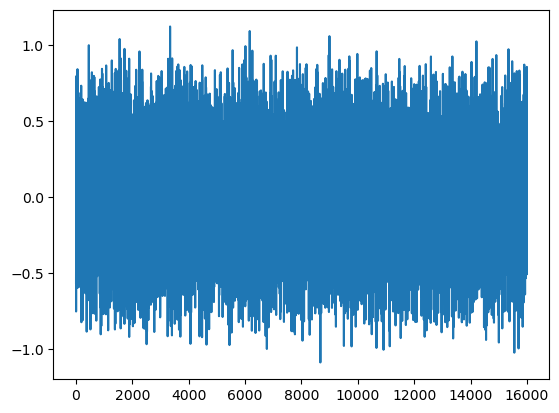

In [6]:
plt.plot(wav_resampled)
plt.show()

# 2. Build Data Loading Function

## 2.1 Define Paths to Files

In [7]:
CAPUCHIN_FILE = os.path.join('data', 'Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
NOT_CAPUCHIN_FILE = os.path.join('data', 'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')

In [88]:
pip uninstall tensorflow
pip uninstall tensorflow-io
pip install tensorflow-gpu
pip install --no-deps tensorflow-io


ERROR: Ignored the following versions that require a different python version: 0.28.0 Requires-Python >=3.7, <3.11
ERROR: Could not find a version that satisfies the requirement tensorflow_io==0.17.1 (from versions: 0.29.0, 0.30.0, 0.31.0)
ERROR: No matching distribution found for tensorflow_io==0.17.1
ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0)
ERROR: No matching distribution found for tensorflow==2.4.0


## 2.2 Build Dataloading Function

In [92]:
import tensorflow as tf
import tensorflow_io as tfio

def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels), with desired number of channels
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Remove trailing axis
    wav = tf.squeeze(wav, axis=-1)
    # Cast sample_rate to integer type
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)

    # Target sampling rate
    target_sr = 16000

    # Perform resampling using TensorFlow I/O
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=target_sr)
    
    return wav


## 2.3 Plot Wave

In [93]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

NotImplementedError: in user code:

    File "c:\Users\Dell 5505\anaconda3\Lib\site-packages\tensorflow_io\python\ops\audio_ops.py", line 458, in f
        return core_ops.io_audio_resample(
    File "c:\Users\Dell 5505\anaconda3\Lib\site-packages\tensorflow_io\python\ops\__init__.py", line 88, in __getattr__
        return getattr(self._load(), attrb)
    File "c:\Users\Dell 5505\anaconda3\Lib\site-packages\tensorflow_io\python\ops\__init__.py", line 84, in _load
        self._mod = _load_library(self._library)
    File "c:\Users\Dell 5505\anaconda3\Lib\site-packages\tensorflow_io\python\ops\__init__.py", line 69, in _load_library
        raise NotImplementedError(

    NotImplementedError: unable to open file: libtensorflow_io.so, from paths: ['c:\\Users\\Dell 5505\\anaconda3\\Lib\\site-packages\\tensorflow_io\\python\\ops\\libtensorflow_io.so']
    caused by: ['c:\\Users\\Dell 5505\\anaconda3\\Lib\\site-packages\\tensorflow_io\\python\\ops\\libtensorflow_io.so not found']


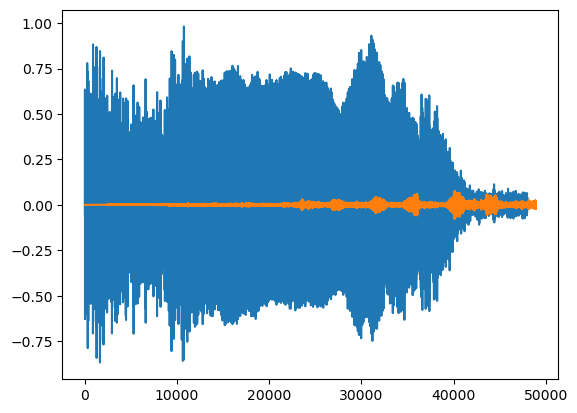

In [67]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

In [68]:
print(wave)
print(wave.shape)

tf.Tensor(
[-0.05156644  0.10698242  0.33992094 ...  0.04074289 -0.00256476
 -0.02162626], shape=(48000,), dtype=float32)
(48000,)


# 3. Create Tensorflow Dataset

## 3.1 Define Paths to Positive and Negative Data

In [69]:
POS = os.path.join('data', 'Parsed_Capuchinbird_Clips')
NEG = os.path.join('data', 'Parsed_Not_Capuchinbird_Clips')

In [70]:
print(POS)

data\Parsed_Capuchinbird_Clips


## 3.2 Create Tensorflow Datasets

In [71]:
pos = tf.data.Dataset.list_files(POS+'\*.wav')
neg = tf.data.Dataset.list_files(NEG+'\*.wav')

In [72]:
#test
print(pos)
len(pos)

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>


217

## 3.3 Add labels and Combine Positive and Negative Samples

In [73]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

# 4. Determine Average Length of a Capuchin Call

## 4.1 Calculate Wave Cycle Length

In [74]:
#lengths is the python list write sample of all the files
lengths = []
for file in os.listdir(os.path.join('data', 'Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('data', 'Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))

In [75]:
#test

print(lengths)

[40000, 48000, 56000, 48000, 56000, 64000, 64000, 64000, 56000, 56000, 48000, 56000, 64000, 56000, 40000, 64000, 64000, 64000, 64000, 56000, 56000, 56000, 56000, 48000, 48000, 56000, 56000, 64000, 64000, 48000, 56000, 64000, 56000, 64000, 32000, 40000, 48000, 40000, 56000, 56000, 56000, 56000, 48000, 48000, 64000, 64000, 48000, 64000, 48000, 48000, 40000, 48000, 48000, 56000, 56000, 48000, 40000, 56000, 48000, 40000, 56000, 48000, 48000, 56000, 48000, 64000, 64000, 40000, 40000, 72000, 56000, 56000, 56000, 64000, 56000, 64000, 64000, 56000, 56000, 56000, 48000, 48000, 48000, 56000, 56000, 56000, 48000, 56000, 56000, 56000, 48000, 56000, 40000, 64000, 56000, 56000, 40000, 64000, 56000, 64000, 48000, 64000, 56000, 48000, 48000, 48000, 64000, 64000, 64000, 48000, 48000, 56000, 48000, 64000, 48000, 64000, 56000, 56000, 56000, 48000, 56000, 56000, 40000, 48000, 48000, 32000, 48000, 40000, 64000, 56000, 32000, 40000, 40000, 48000, 48000, 48000, 64000, 56000, 56000, 48000, 56000, 48000, 48000

## 4.2 Calculate Mean, Min and Max

In [22]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [76]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [77]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

# 5. Build Preprocessing Function to Convert to Spectrogram

## 5.1 Build Preprocessing Function

In [78]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

## 5.2 Test Out the Function and Viz the Spectrogram

In [79]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [80]:
spectrogram, label = preprocess(filepath, label)

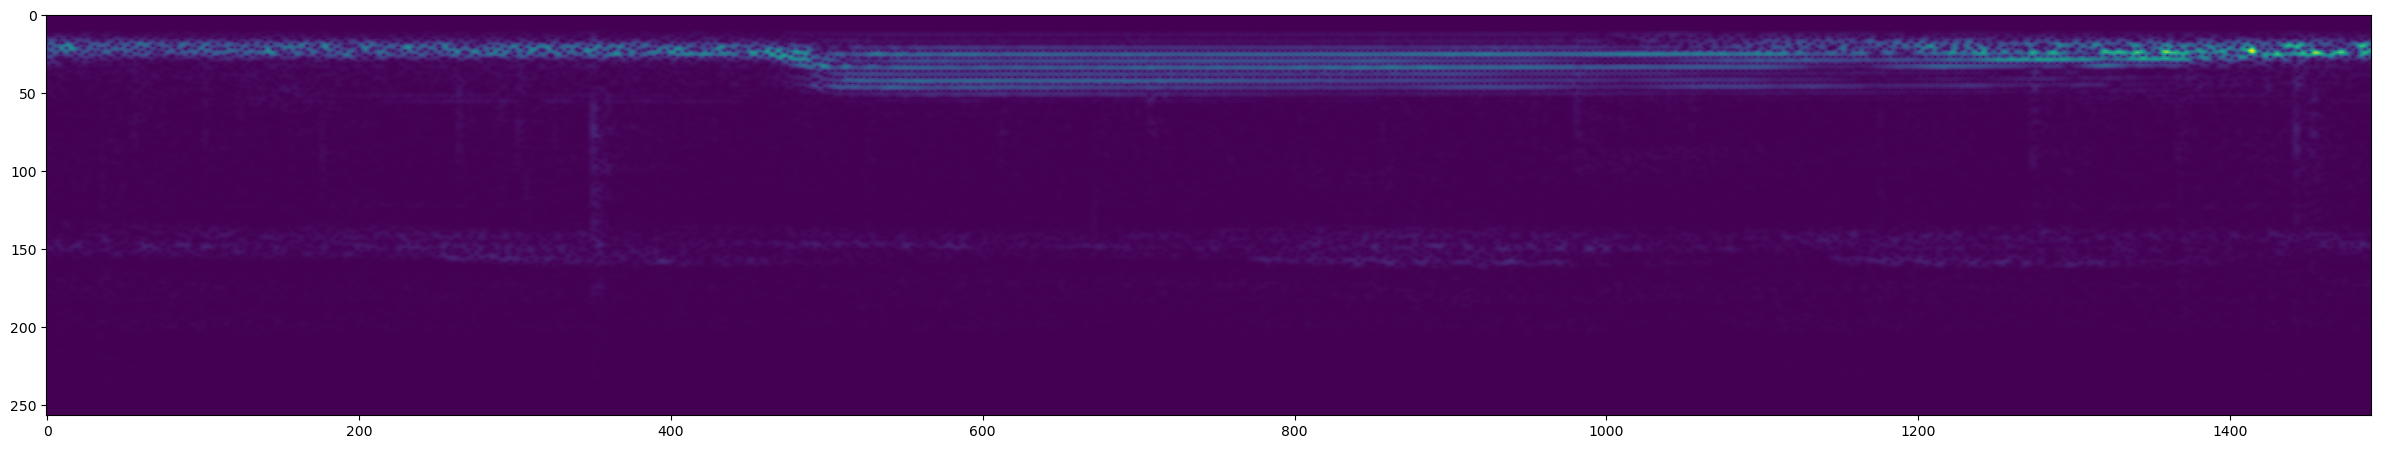

In [81]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# 6. Create Training and Testing Partitions

## 6.1 Create a Tensorflow Data Pipeline

In [82]:
data.as_numpy_iterator().next()

(b'data\\Parsed_Capuchinbird_Clips\\XC201990-4.wav', 1.0)

In [83]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

AttributeError: in user code:

    File "C:\Users\Dell 5505\AppData\Local\Temp\ipykernel_14896\3763039504.py", line 2, in preprocess  *
        wav = load_wav_16k_mono(file_path)
    File "C:\Users\Dell 5505\AppData\Local\Temp\ipykernel_14896\3846239504.py", line 8, in load_wav_16k_mono  *
        wav = wav.numpy()

    AttributeError: 'Tensor' object has no attribute 'numpy'


## 6.2 Split into Training and Testing Partitions

In [32]:
train = data.take(36)
test = data.skip(36).take(15)

## 6.3 Test One Batch

In [33]:
samples, labels = train.as_numpy_iterator().next()

In [34]:
samples.shape

AttributeError: 'bytes' object has no attribute 'shape'

# 7. Build Deep Learning Model

## 7.1 Load Tensorflow Dependencies

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

## 7.2 Build Sequential Model, Compile and View Summary

In [36]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257,1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 16)     160       
                                                                 
 conv2d_1 (Conv2D)           (None, 1487, 253, 16)     2320      
                                                                 
 flatten (Flatten)           (None, 6019376)           0         
                                                                 
 dense (Dense)               (None, 128)               770480256 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 770482865 (-1213035836.00 Byte)
Trainable params: 770482865 (-1213035836.00 Byte)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________

c:\Users\Dell 5505\anaconda3\Lib\site-packages\keras\src\utils\layer_utils.py:146: RuntimeWarning: overflow encountered in scalar multiply
  total_memory_size += weight_shape * per_param_size


## 7.3 Fit Model, View Loss and KPI Plots

In [39]:
hist = model.fit(train, epochs=4, validation_data=test)

Epoch 1/4


ValueError: in user code:

    File "c:\Users\Dell 5505\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Dell 5505\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Dell 5505\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Dell 5505\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Dell 5505\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Dell 5505\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=0. Full shape received: ()
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(), dtype=string)
      • training=True
      • mask=None


In [ ]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

In [ ]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

In [ ]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

# 8. Make a Prediction on a Single Clip

## 8.1 Get One Batch and Make a Prediction

In [ ]:
X_test, y_test = test.as_numpy_iterator().next()

In [ ]:
yhat = model.predict(X_test)

## 8.2 Convert Logits to Classes 

In [ ]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

# 9. Build Forest Parsing Functions

## 9.1 Load up MP3s

In [ ]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels 
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
mp3 = os.path.join('data', 'Forest Recordings', 'recording_00.mp3')

In [ ]:
wav = load_mp3_16k_mono(mp3)

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [ ]:
samples, index = audio_slices.as_numpy_iterator().next()

## 9.2 Build Function to Convert Clips into Windowed Spectrograms

In [ ]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

## 9.3 Convert Longer Clips into Windows and Make Predictions

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [ ]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

## 9.4 Group Consecutive Detections

In [ ]:
from itertools import groupby

In [ ]:
yhat = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat).numpy()

In [ ]:
calls

# 10. Make Predictions

## 10.1 Loop over all recordings and make predictions

In [ ]:
results = {}
for file in os.listdir(os.path.join('data', 'Forest Recordings')):
    FILEPATH = os.path.join('data','Forest Recordings', file)
    
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    
    yhat = model.predict(audio_slices)
    
    results[file] = yhat

In [ ]:
results

## 10.2 Convert Predictions into Classes

In [ ]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

## 10.3 Group Consecutive Detections

In [ ]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

# 11. Export Results

In [ ]:
import csv

In [ ]:
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])